<h1>Tugas Data Mining 6 (Logistic Regression)</h1>
<br />
<ul>
    <li><b>Nama  : Al-Fariqy Raihan Azhwar</b></li>
    <li><b>NPM   : 202143501514</b></li>
    <li><b>Kelas : R6Q</b></li>
</ul>
<br />

<h3>Case 1 : Heart Disease Prediction</h3>
<br />
<p><b>Tujuan :</b></p>
<ul>
  <li>
    ingin memprediksi apakah seseorang kemungkinan terkena serangan jantung.
  </li>
</ul>

<br />

<p><b>Atribut :</b></p>
<ul>
  <li>Usia: Usia pasien</li>
  <li>
    Jenis Kelamin : Jenis kelamin pasien (1 = laki-laki | 0 = perempuan)
  </li>
  <li>Exang: angina akibat olahraga (1 = ya | 0 = tidak)</li>
  <li>caa: jumlah pembuluh arteri (0-3)</li>
  <li>
    cp : Tipe nyeri dada
    <ul>
      <li>Nilai 1 : Angina Tipikal</li>
      <li>Nilai 2 : Angina Atipikal</li>
      <li>Nilai 3 : Non-Angina</li>
      <li>Nilai 4 : Tanpa Gejala</li>
    </ul>
  </li>
  <li>trtbps : tekanan darah istirahat (dalam MM/Hg)</li>
  <li>chol : kolestoral dalam mg/dl diambil melalui sensor BMI</li>
  <li>fbs : gula darah puasa >120 mg/dl (1 = benar; 0 = salah)</li>
  <li>
    rest_ecg : hasil elektrokardiografi istirahat
    <ul>
      <li>Nilai 0 : biasa</li>
      <li>
        Nilai 1 : mengalami kelainan gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST > 0,05 mV)
      </li>
      <li>Nilai 2: menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri menurut kriteria Estes</li>
    </ul>
  </li>
  <li>thalach : tercapai denyut jantung maksimal</li>
</ul>

<br />

<p><b>Output (Target) :</b></p>
<ul>
  <li>0 = lebih kecil kemungkinan terkena serangan jantung</li>
  <li>1 = lebih besar kemungkinan terkena serangan jantung</li>
</ul>

<h3>Download Datasets</h3>

In [ ]:
# men- download dataset yang sama dari sumber yang lain

!wget \
  -N https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv \
  -P datasets

!mv datasets/dataset.csv \
  datasets/heart-disease-prediction.csv

!chmod u=r datasets/$(ls datasets | grep .csv) && \
  pwd && ls -al datasets

--2024-04-28 04:59:42--  https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11024 (11K) [text/plain]
Saving to: ‘datasets/dataset.csv’

dataset.csv         100%[===================>]  10.77K  --.-KB/s    in 0.001s  

Last-modified header missing -- time-stamps turned off.
2024-04-28 04:59:43 (12.1 MB/s) - ‘datasets/dataset.csv’ saved [11024/11024]

/content
total 20
drwxr-xr-x 2 root root  4096 Apr 28 04:59 .
drwxr-xr-x 1 root root  4096 Apr 28 00:52 ..
-r--r--r-- 1 root root 11024 Apr 28 04:59 heart-disease-prediction.csv


<h3>Import libraries</h3>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from warnings import filterwarnings
from matplotlib import pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split

filterwarnings('ignore')

<h3>Load dataset and read dataframe</h3>

In [ ]:
loc_dataset = "./datasets/heart-disease-prediction.csv"
heart_disease_dataframe = pd.read_csv(loc_dataset)
heart_disease_dataframe.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


<h3>Dataframe Information</h3>

In [ ]:
heart_disease_dataframe.info()
heart_disease_dataframe.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(303, 14)

In [ ]:
heart_disease_dataframe.describe(
  include = 'all'
)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


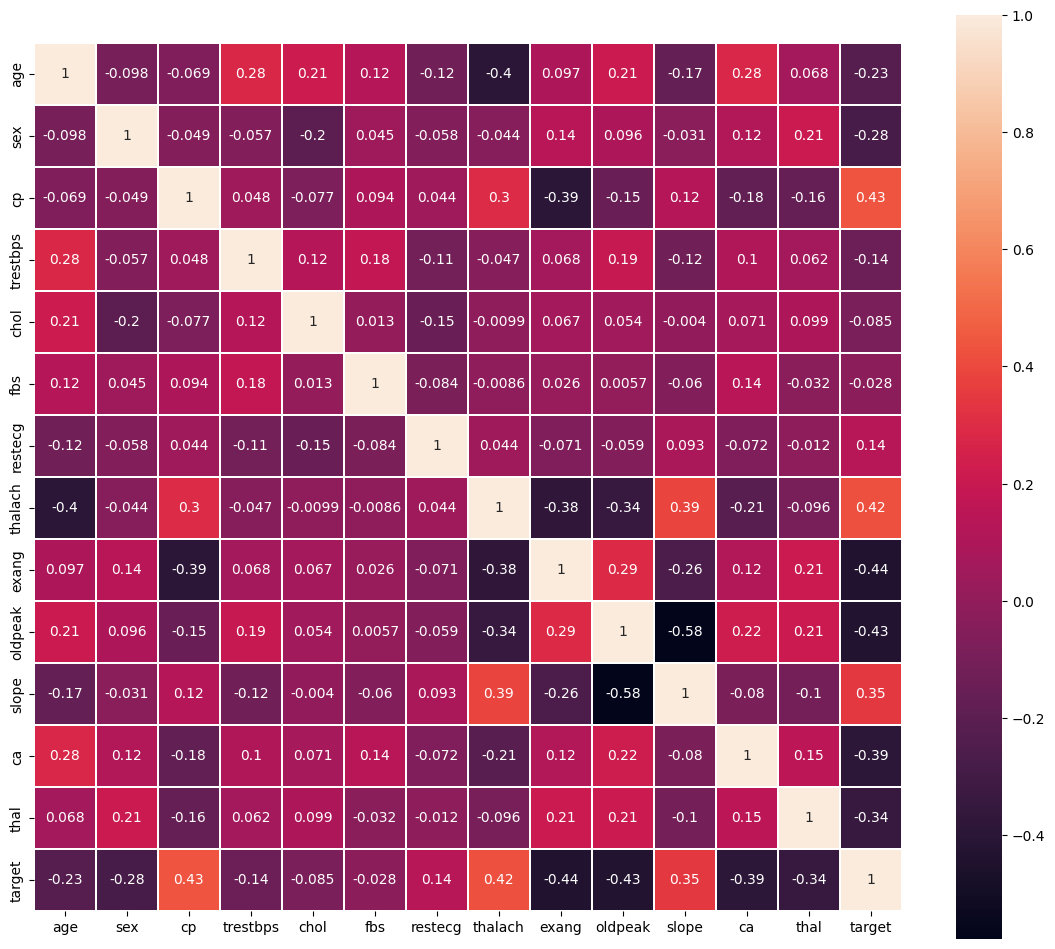

In [ ]:
plt.figure(figsize = (14, 12))

sns.heatmap(
  heart_disease_dataframe.astype(float).corr(),
  linewidths = 0.1,
  square     = True,
  linecolor  = "white",
  annot      = True
)

plt.show()

<h3>Search and Clean missing values</h3>

In [ ]:
heart_disease_dataframe.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

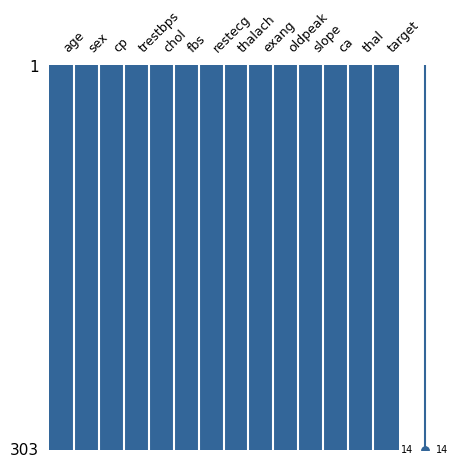

In [ ]:
msno.matrix(
    heart_disease_dataframe,
    figsize  = (5, 5),
    fontsize = 9,
    color    = (0.2, 0.4, 0.6)
)

In [ ]:
missing_col_names = [
    col for col, _ in heart_disease_dataframe.to_dict().items() \
      if heart_disease_dataframe[col].isnull().sum() > 0
]

print(f"Hasil: {'Ada missing values' if len(missing_col_names) > 0 else 'Tidak ada missing values'}")

Hasil: Tidak ada missing values


<h3>Data Transformation (Normalization and Standarization)</h3>

In [ ]:
col_names : list = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scalers   : dict = {'Normalization': MinMaxScaler(), 'Standarization': StandardScaler()}

for s_name, s_obj in scalers.items():
    transform = s_obj.fit_transform(heart_disease_dataframe[col_names])
    print(f"| {s_name} |\n|{', '.join(col_names)}|\n{transform}\n\n")

| Normalization |
|age, trestbps, chol, thalach, oldpeak|
[[0.70833333 0.48113208 0.24429224 0.60305344 0.37096774]
 [0.16666667 0.33962264 0.28310502 0.88549618 0.56451613]
 [0.25       0.33962264 0.17808219 0.77099237 0.22580645]
 ...
 [0.8125     0.47169811 0.15296804 0.53435115 0.5483871 ]
 [0.58333333 0.33962264 0.01141553 0.33587786 0.19354839]
 [0.58333333 0.33962264 0.25114155 0.78625954 0.        ]]


| Standarization |
|age, trestbps, chol, thalach, oldpeak|
[[ 0.9521966   0.76395577 -0.25633371  0.01544279  1.08733806]
 [-1.91531289 -0.09273778  0.07219949  1.63347147  2.12257273]
 [-1.47415758 -0.09273778 -0.81677269  0.97751389  0.31091206]
 ...
 [ 1.50364073  0.70684287 -1.029353   -0.37813176  2.03630317]
 [ 0.29046364 -0.09273778 -2.2275329  -1.51512489  0.13837295]
 [ 0.29046364 -0.09273778 -0.19835726  1.0649749  -0.89686172]]




<h3>Splitting dataframe</h3>

In [ ]:
x_val = heart_disease_dataframe.drop(["target"], axis = 1)
y_val = heart_disease_dataframe["target"]
x_val.shape, y_val.shape

((303, 13), (303,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
  x_val, y_val,
  test_size    = 0.2,
  random_state = 0
)

<h3>Heart disease modeling</h3>

In [ ]:
heart_disease_model = LogisticRegression()
heart_disease_model.fit(x_train, y_train)
print(heart_disease_model.coef_)

[[ 0.00866021 -1.41457366  0.7638598  -0.00780433 -0.00336632 -0.28616437
   0.27741605  0.02940021 -0.82257839 -0.52122259  0.19519454 -0.83202606
  -0.74952416]]


In [ ]:
y_pred = pd.Series(
  heart_disease_model.predict(x_test)
)

y_test  = y_test.reset_index(drop = True)
concate = pd.concat([y_test, y_pred], axis = 1)

concate.columns = ["True", "Prediction"]
concate.head(8)

,True,Prediction
0,0,0
1,1,1
2,0,1
3,0,0
4,1,0
5,0,0
6,0,0
7,0,0


In [ ]:
print(
  f"Accuracy  : {metrics.accuracy_score(y_test, y_pred)} \n"  +
  f"Precision : {metrics.precision_score(y_test, y_pred)}\n" +
  f"Recall    : {metrics.recall_score(y_test, y_pred)}"
)

Accuracy  : 0.8524590163934426 
Precision : 0.8571428571428571
Recall    : 0.8823529411764706


<h3>Measure model performance</h3>

Text(0.5, 23.52222222222222, 'True')

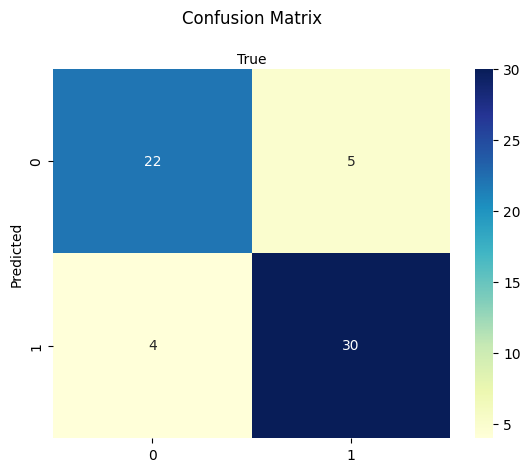

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = [1, 0]

fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))

plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

sns.heatmap(
  pd.DataFrame(cnf_matrix),
  annot = True,
  cmap  = "YlGnBu",
  fmt   = "g"
)

ax.xaxis.set_label_position("top")

plt.title("Confusion Matrix", y = 1.1)
plt.ylabel("Predicted")
plt.xlabel("True")

<br />
<hr />
<br />

<h3>Case 2 : Knowing and Measuring the quality of public services</h3>
<br />
<p><b>Tujuan :</b></p>
<ul>
  <li>
    Mengetahui dan Mengukur pengaruh kualitas pelayanan publik terhadap kepuasan masyarakat
  </li>
</ul>

<br />

<p><b>Atribut :</b></p>
<ul>
  <li>
    X1: Kualitas pelayanan publik diteliti melalui uji variabel Daya Tanggap
  </li>
  <li>X2 : Empati</li>
</ul>

<br />

<p><b>Output (Target) :</b></p>
<ul>
  <li>
    Y : Kepuasan penggunaan layanan
      <ul>
        <li>1 = Masyarakat Puas</li>
        <li>0 = Masyarakat Tidak Puas</li>
      </ul>
  </li>
</ul>

<h3>Load dataset and read dataframe</h3>

In [ ]:
datasets = {
    'X1': [31, 33, 33, 32, 32, 33, 31, 36, 31, 32, 36, 32, 32, 33, 31, 34, 35, 34, 33, 34, 32, 36, 33, 30, 36, 33, 32, 30, 30, 36, 33, 33, 35, 35, 34, 30, 30, 35, 32, 33, 34, 32, 34, 30, 34, 34, 33, 34, 35, 35],
    'X2': [46, 38, 39, 37, 43, 42, 45, 45, 34, 37, 44, 41, 40, 35, 42, 41, 37, 43, 40, 43, 39, 42, 37, 38, 43, 41, 39, 36, 36, 42, 38, 38, 41, 41, 40, 38, 40, 41, 42, 40, 43, 38, 42, 41, 40, 42, 38, 44, 43, 44],
    'Y': [1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1]
}

In [ ]:
public_services_dataframe = pd.DataFrame(datasets)
public_services_dataframe.head(10)

,X1,X2,Y
0,31,46,1
1,33,38,1
2,33,39,1
3,32,37,0
4,32,43,1
5,33,42,0
6,31,45,1
7,36,45,1
8,31,34,0
9,32,37,1


<h3>Dataframe Information</h3>

In [ ]:
public_services_dataframe.info()
public_services_dataframe.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      50 non-null     int64
 1   X2      50 non-null     int64
 2   Y       50 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


(50, 3)

In [ ]:
public_services_dataframe.describe(
  include = 'all'
)

,X1,X2,Y
count,50.000000,50.000000,50.000000
mean,33.020000,40.380000,0.480000
std,1.789881,2.769292,0.504672
min,30.000000,34.000000,0.000000
25%,32.000000,38.000000,0.000000
50%,33.000000,41.000000,0.000000
75%,34.000000,42.000000,1.000000
max,36.000000,46.000000,1.000000


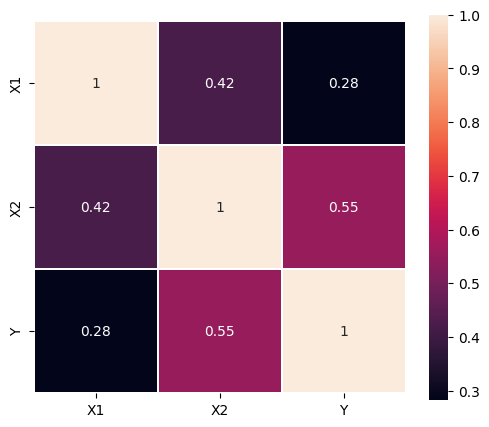

In [ ]:
plt.figure(figsize = (6, 5))

sns.heatmap(
  public_services_dataframe.astype(float).corr(),
  linewidths = 0.1,
  square     = True,
  linecolor  = "white",
  annot      = True
)

plt.show()

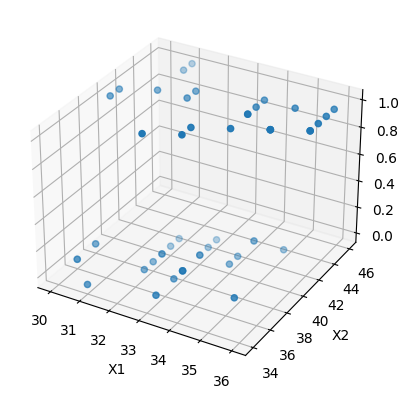

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
  datasets['X1'],
  datasets['X2'],
  datasets['Y']
)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.show()

<h3>Search and Clean missing values</h3>

In [ ]:
public_services_dataframe.isna().sum()

X1    0
X2    0
Y     0
dtype: int64

<Axes: >

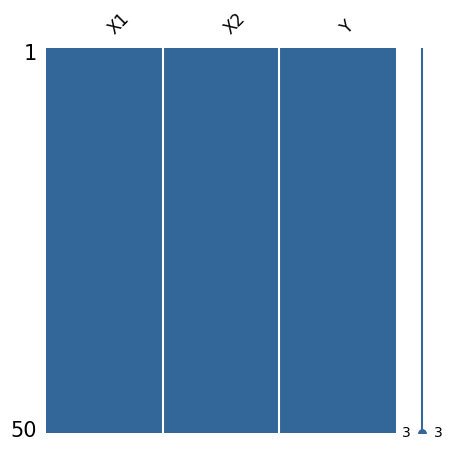

In [ ]:
msno.matrix(
    public_services_dataframe,
    figsize  = (5, 5),
    fontsize = 12,
    color    = (0.2, 0.4, 0.6)
)

In [ ]:
missing_col_names = [
    col for col, _ in public_services_dataframe.to_dict().items() \
      if public_services_dataframe[col].isnull().sum() > 0
]

print(f"Hasil: {'Ada missing values' if len(missing_col_names) > 0 else 'Tidak ada missing values'}")

Hasil: Tidak ada missing values


<h3>Data Transformation (Normalization and Standarization)</h3>

In [ ]:
col_names : list = ['X1', 'X2']
scalers   : dict = {'Normalization': MinMaxScaler(), 'Standarization': StandardScaler()}

for s_name, s_obj in scalers.items():
    transform = s_obj.fit_transform(public_services_dataframe[col_names])
    print(f"| {s_name} |\n|{', '.join(col_names)}|\n{transform}\n\n")

| Normalization |
|X1, X2|
[[0.16666667 1.        ]
 [0.5        0.33333333]
 [0.5        0.41666667]
 [0.33333333 0.25      ]
 [0.33333333 0.75      ]
 [0.5        0.66666667]
 [0.16666667 0.91666667]
 [1.         0.91666667]
 [0.16666667 0.        ]
 [0.33333333 0.25      ]
 [1.         0.83333333]
 [0.33333333 0.58333333]
 [0.33333333 0.5       ]
 [0.5        0.08333333]
 [0.16666667 0.66666667]
 [0.66666667 0.58333333]
 [0.83333333 0.25      ]
 [0.66666667 0.75      ]
 [0.5        0.5       ]
 [0.66666667 0.75      ]
 [0.33333333 0.41666667]
 [1.         0.66666667]
 [0.5        0.25      ]
 [0.         0.33333333]
 [1.         0.75      ]
 [0.5        0.58333333]
 [0.33333333 0.41666667]
 [0.         0.16666667]
 [0.         0.16666667]
 [1.         0.66666667]
 [0.5        0.33333333]
 [0.5        0.33333333]
 [0.83333333 0.58333333]
 [0.83333333 0.58333333]
 [0.66666667 0.5       ]
 [0.         0.33333333]
 [0.         0.5       ]
 [0.83333333 0.58333333]
 [0.33333333 0.66666667

<h3>Splitting dataframe</h3>

In [ ]:
x_val = public_services_dataframe.drop(["Y"], axis = 1)
y_val = public_services_dataframe["Y"]
x_val.shape, y_val.shape

((50, 2), (50,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
  x_val, y_val,
  test_size    = 0.2,
  random_state = 0
)

<h3>Public services modeling</h3>

In [ ]:
public_services_model = LogisticRegression()
public_services_model.fit(x_train, y_train)
print(public_services_model.coef_)

[[0.06342013 0.45293147]]


In [ ]:
y_pred = pd.Series(
  public_services_model.predict(x_test)
)

y_test  = y_test.reset_index(drop = True)
concate = pd.concat([y_test, y_pred], axis = 1)

concate.columns = ["True", "Prediction"]
concate.head(5)

,True,Prediction
0,0,0
1,0,1
2,1,1
3,0,0
4,1,0


In [ ]:
print(
  f"Accuracy  : {metrics.accuracy_score(y_test, y_pred)} \n" +
  f"Precision : {metrics.precision_score(y_test, y_pred)}\n" +
  f"Recall    : {metrics.recall_score(y_test, y_pred)}"
)

Accuracy  : 0.8 
Precision : 0.75
Recall    : 0.75


<h3>Measure model performance</h3>

Text(0.5, 23.52222222222222, 'True')

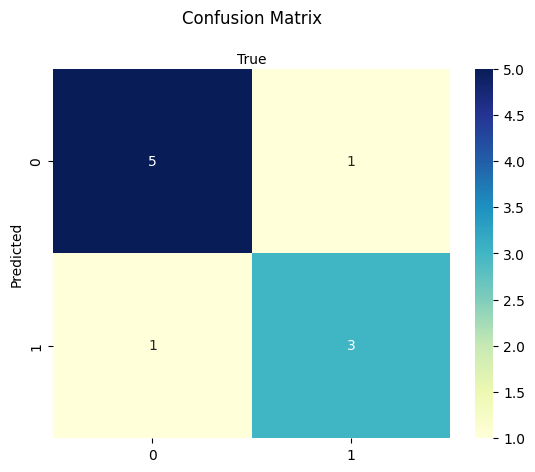

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = [1, 0]

fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))

plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

sns.heatmap(
  pd.DataFrame(cnf_matrix),
  annot = True,
  cmap  = "YlGnBu",
  fmt   = "g"
)

ax.xaxis.set_label_position("top")

plt.title("Confusion Matrix", y = 1.1)
plt.ylabel("Predicted")
plt.xlabel("True")